In [1]:
import string
import numpy
import pandas

def only_alpha(str):
    input_char = ""
    for char in str:
        if char.isalpha():
            input_char += char
    return input_char

def permutation(str,n,dict):
    for i in range(len(only_alpha(str))-1):
        if only_alpha(str)[i:i+2] not in dict:
            dict[only_alpha(str)[i:i+2]] = n
            continue
        dict[only_alpha(str)[i:i+2]] += n

In [2]:
count = {}
# Visitors
permutation("F → G → L → W → L → T → N → F", 50*4, count)
permutation("F → R → M → F", 40*2, count)
permutation("E → I → J → W → J → T → E", 100*5, count)
permutation("H → G →S → L → G → D → T", 30*5, count)
#permutation("E → K → T/W/R → K → V → T → E", 60, count)
permutation("E → K → T → K → V → T → E", 20*5, count)
permutation("E → K → W → K → V → T → E", 20*5, count)
permutation("E → K → R → K → V → T → E", 20*5, count)

permutation("F → L → R → O → T → C → F", 60*1, count)
permutation("F → O → T → M → F", 40*2, count)
permutation("F → R → M → N → F", 40*1, count)
permutation("W → G → S → T", 60*2, count)
#permutation("F → T → B/A/D → F", 50, count)
permutation("F → T → B → F", 15*2, count)
permutation("F → T → A → F", 15*2, count)
permutation("F → T → D → F", 20*2, count)

In [3]:
uplt = string.ascii_uppercase[:20] + string.ascii_uppercase[21:23]

count_matrix = numpy.zeros((22,22))
tf_matrix = numpy.zeros((22,22))

for letter1 in uplt:
    for letter2 in uplt:
        if letter1+letter2 in count.keys():
            count_matrix[uplt.index(letter1)][uplt.index(letter2)] += count[letter1+letter2]
            tf_matrix[uplt.index(letter1)][uplt.index(letter2)] = 1
        if letter2+letter1 in count.keys():
            count_matrix[uplt.index(letter1)][uplt.index(letter2)] += count[letter2+letter1]
            tf_matrix[uplt.index(letter1)][uplt.index(letter2)] = 1
count_matrix

count_matrix_0_1 = count_matrix/count_matrix.max()

# Degree
# 0.2 and 0.4 ... are not actual numbers, just for convenience
count_matrix_degree = pandas.cut(count_matrix_0_1.flatten(), bins=4, labels=[0.2,0.4,0.6,0.8])
count_matrix_degree_matrix = numpy.asarray(count_matrix_degree).reshape((22,22)).tolist()

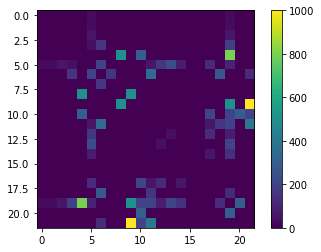

In [4]:
import matplotlib.pyplot as plt
plt.imshow(count_matrix)
plt.colorbar()
plt.show()

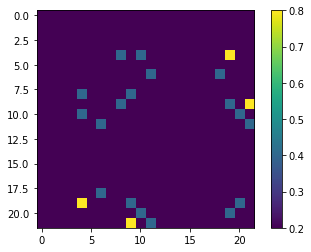

In [5]:
plt.imshow(count_matrix_degree_matrix)
plt.colorbar()
plt.show()

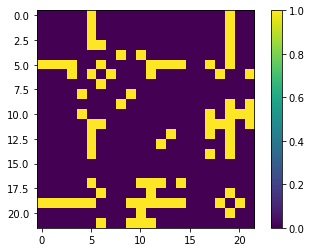

In [6]:
plt.imshow(tf_matrix)
plt.colorbar()
plt.show()

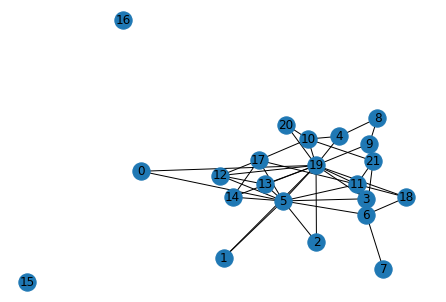

In [7]:
import networkx as nx
G = nx.from_numpy_matrix(count_matrix_0_1)
nx.draw(G, with_labels=True)